- Sulphur dioxide ( SO2 ) : This contaminant is mainly emitted during the combustion of fossil fuels such as crude oil and coal.
- Carbon monoxide ( CO ) : This gas consists during incomplete combustion of fuels example : A car engine running in a closed room.
- Nitrogen dioxide ( NO2 ) : These contaminants are emitted by traffic, combustion installations and the industries.
- Ozone ( O3 ) : Ozone is created through the influence of ultra violet sunlight (UV) on pollutants in the outside air.
- Particulate Matter ( PM ) : Particulate matter is the sum of all solid and liquid particles suspended in air. This complex mixture includes both organic and inorganic particles, such as dust, pollen, soot, smoke, and liquid droplets. These particles vary greatly in size, composition, and origin.

In [1]:
import pandas as pd

In [2]:
air_df = pd.read_csv('data/air_quality_full.csv')

In [3]:
air_df.head()

,Unnamed: 0,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,0,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,no2,131.87,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
1,1,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,o3,15.57,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
2,2,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,pm25,45.62,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
3,3,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,so2,4.49,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
4,4,"BWSSB Kadabesanahalli, Bengaluru - KSPCB",Bengaluru,IN,co,840.00,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.938906,77.69727,0.25


In [4]:
air_df.shape

(21211, 12)

In [5]:
air_df.country.nunique()

98

In [6]:
air_df.city.value_counts()

Austria                408
Delhi                  251
Bayern                 179
Nordrhein-Westfalen    171
Madrid                 166
                      ... 
Dumbarton                1
CAMERON                  1
Arica                    1
Barbosa                  1
ST. BERNARD              1
Name: city, Length: 2372, dtype: int64

In [7]:
air_df.pollutant.value_counts()

no2     4708
o3      4629
pm10    3742
pm25    3309
so2     2813
co      1907
bc       103
Name: pollutant, dtype: int64

In [8]:
air_df[air_df.city=='Austria'].pollutant.value_counts()

no2     130
pm10    102
o3       92
so2      60
co       24
Name: pollutant, dtype: int64

In [9]:
air_df.unit.unique()# 1 microgram / cubic meter: µg/m³, parts-per-million: ppm

array(['µg/m³', 'ppm'], dtype=object)

In [10]:
air_df[air_df.country=='FR'];

# Data preparation

## Drop useless columns

In [11]:
air_df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
air_df.isna().sum()

location                     4
city                        70
country                      0
pollutant                    0
value                        0
timestamp                    0
unit                         0
source_name                  0
latitude                     0
longitude                    0
averaged_over_in_hours    1422
dtype: int64

## Drop nan values

In [13]:
air_df.dropna(inplace=True)

## Creating Dummies

- Create Dummies 
    - Cities : Paris, New York, Delhi, Sao Paolo, Dubai, Madrid
    - pollutant: bc/co/no2/o3/so2/pm10/pm25
    - source_name
    - year
    - month
    - day
    - hour

In [14]:
air_cls = air_df[(air_df.city=='Paris')|(air_df.city=='Austria')|(air_df.city=='NEW YORK')|(air_df.city=='Sao Paulo')|(air_df.city=='Dubai')|(air_df.city=='Delhi')|(air_df.city=='Madrid')]

In [15]:
df_ml = pd.get_dummies(data=air_cls, columns=['pollutant'])

In [16]:
df_ml = pd.get_dummies(data=df_ml, columns=['source_name'], drop_first=True)

In [17]:
df_ml.drop(columns=['location','country','unit','latitude','longitude'],inplace=True)

In [18]:
df_ml = pd.get_dummies(data=df_ml, columns=['city'], drop_first=True)

In [19]:
df_ml['hour'] = pd.to_datetime(df_ml.timestamp).dt.hour
df_ml['month'] = pd.to_datetime(df_ml.timestamp).dt.month
df_ml['day'] = pd.to_datetime(df_ml.timestamp).dt.day
df_ml['year'] = pd.to_datetime(df_ml.timestamp).dt.year

In [20]:
df_ml.drop(columns=['timestamp'],inplace=True)

In [21]:
df_ml.shape

(897, 26)

## Scaling data

In [22]:
df_ml.describe()

,value,averaged_over_in_hours,pollutant_co,pollutant_no2,pollutant_o3,pollutant_pm10,pollutant_pm25,pollutant_so2,source_name_CPCB,source_name_EEA Austria,...,city_Delhi,city_Dubai,city_Madrid,city_NEW YORK,city_Paris,city_Sao Paulo,hour,month,day,year
count,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.00000,897.000000,897.000000,...,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000
mean,173.116382,0.801003,0.100334,0.275362,0.207358,0.209588,0.080268,0.12709,0.060201,0.454849,...,0.278707,0.002230,0.185061,0.001115,0.032330,0.045708,9.380156,7.993311,16.929766,2017.885173
std,1815.548570,0.331316,0.300613,0.446946,0.405640,0.407241,0.271859,0.33326,0.237991,0.498235,...,0.448613,0.047193,0.388564,0.033389,0.176974,0.208967,6.013505,3.405281,5.237504,1.795074
min,-6.050000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2015.000000
25%,8.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,12.000000,2016.000000
50%,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,7.000000,19.000000,2017.000000
75%,66.470000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,20.000000,2020.000000
max,50000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,12.000000,30.000000,2020.000000


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=df_ml.drop(columns=['value'])
y= df_ml['value']
X_scaled=scaler.fit_transform(X)

## Clusterisation

### Elbow method

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
import matplotlib.pyplot as plt

In [25]:
km_scores= []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))

Score for number of cluster(s) 2: -1611.045259516441
Score for number of cluster(s) 3: -1178.1474782464638
Score for number of cluster(s) 4: -1042.3498719124232
Score for number of cluster(s) 5: -941.7298036514112
Score for number of cluster(s) 6: -838.2876655392546
Score for number of cluster(s) 7: -766.5478544642649
Score for number of cluster(s) 8: -664.2760083268571
Score for number of cluster(s) 9: -614.2292605390121
Score for number of cluster(s) 10: -542.301513973806
Score for number of cluster(s) 11: -511.7512186151616


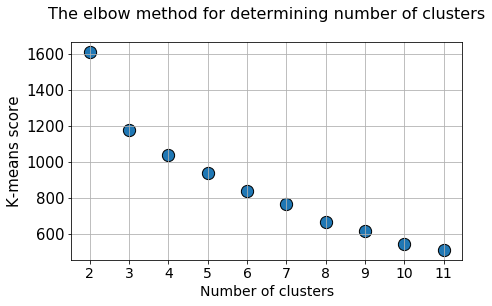

In [26]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Based on the elbow technic, 5 clusters would give us a good classification to those data

### Evaluation cluster:

In [27]:
silhouette = silhouette_score(X_scaled,preds)
print("Silhouette score for number of cluster(s) {}: {}".format(5,silhouette))
    
db = davies_bouldin_score(X_scaled,preds)
print("Davies Bouldin score for number of cluster(s) {}: {}".format(5,db))

Silhouette score for number of cluster(s) 5: 0.49385142540975013
Davies Bouldin score for number of cluster(s) 5: 1.0824042807266734


### Clustering data

In [28]:
from sklearn.cluster import KMeans
df_clusters = KMeans(5) 
df_clusters.fit(X_scaled)
df_ml['Cluster'] = (df_clusters.labels_)

In [29]:
y_kmeans = df_clusters.predict(X_scaled)

In [30]:
dff = pd.DataFrame(X_scaled,columns=X.columns)
dff

,averaged_over_in_hours,pollutant_co,pollutant_no2,pollutant_o3,pollutant_pm10,pollutant_pm25,pollutant_so2,source_name_CPCB,source_name_EEA Austria,source_name_EEA France,...,city_Delhi,city_Dubai,city_Madrid,city_NEW YORK,city_Paris,city_Sao Paulo,hour,month,day,year
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.391304,1.000000,0.586207,0.4
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.782609,0.818182,0.896552,0.4
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.782609,0.818182,0.896552,0.4
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.782609,0.818182,0.896552,0.4
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.782609,0.818182,0.896552,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.391304,1.000000,0.379310,0.2
893,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.826087,0.545455,0.655172,0.4
894,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.826087,0.545455,0.655172,0.4
895,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.826087,0.545455,0.655172,0.4


In [31]:
dff.columns

Index(['averaged_over_in_hours', 'pollutant_co', 'pollutant_no2',
       'pollutant_o3', 'pollutant_pm10', 'pollutant_pm25', 'pollutant_so2',
       'source_name_CPCB', 'source_name_EEA Austria', 'source_name_EEA France',
       'source_name_EEA Spain', 'source_name_Sao Paulo',
       'source_name_StateAir_Dubai', 'source_name_caaqm',
       'source_name_data.gov.in', 'city_Delhi', 'city_Dubai', 'city_Madrid',
       'city_NEW YORK', 'city_Paris', 'city_Sao Paulo', 'hour', 'month', 'day',
       'year'],
      dtype='object')

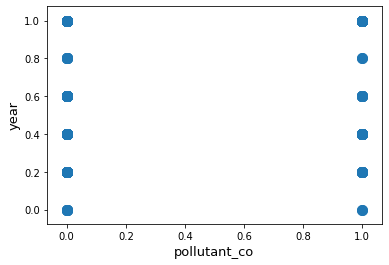

In [32]:
centers = df_clusters.cluster_centers_
plt.xlabel('pollutant_co',fontsize=13)
plt.ylabel('year',fontsize=13)
plt.scatter(dff['pollutant_co'], dff['year'], s=100, cmap='viridis');

In [33]:
pd.crosstab(df_ml.year, df_ml.Cluster)

Cluster,0,1,2,3,4
year,,,,,
2015,0,10,0,0,0
2016,124,2,0,100,76
2017,75,33,0,40,35
2018,1,22,13,2,2
2019,3,5,0,1,1
2020,6,173,153,13,7


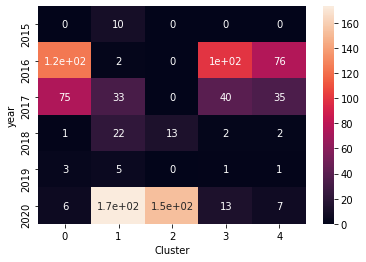

In [34]:
import seaborn as sns
sns.heatmap(pd.crosstab(df_ml.year, df_ml.Cluster),annot=True)

let's have a look on data (2020,cluster0) and (2016,Cluster1) the highest values ; if there is some patterns or hidden info
we can find 

#### First pattern: 

In [39]:
df_ml[(df_ml.year==2020)&(df_ml.Cluster==2)]['source_name_EEA Austria'].value_counts()

0    153
Name: source_name_EEA Austria, dtype: int64

In [38]:
df_ml[(df_ml.year==2020)&(df_ml.Cluster==2)]['averaged_over_in_hours'].value_counts()

1.0    153
Name: averaged_over_in_hours, dtype: int64

All those data are related to the same country austria and averaged over an hour in 2020.

#### Second pattern :

In [35]:
df_ml[(df_ml.year==2020)&(df_ml.Cluster==1)]['averaged_over_in_hours'].value_counts()

0.25    173
Name: averaged_over_in_hours, dtype: int64

In [36]:
df_ml[(df_ml.year==2020)&(df_ml.Cluster==1)].city_Delhi.value_counts()

1    173
Name: city_Delhi, dtype: int64

All those data are related to the same city Delhi in 2020 and all kind of pollutant is recorded averaged over 1/4 hour.

- Hourly:
    Data are collected continuously at each monitoring site for the selected parameters and these are reported as hourly Air Quality Index (AQI) values and hourly data readings in scientific units. 

    At some rural network sites instruments power up every 15 minutes to sample for 1 minute, and only continue measurements if TSP concentrations exceed 25 µg/m3. In this case, unlike the standard averaging method, an algorithm calculates hourly concentrations by accounting for the time between value changes.

## Data Visualization

- bc: Black Carbon
- co: Carbon monoxide
- no2: Nitrogen Dioxide
- o3: Ozone
- so2: Sulphur Dioxide
- pm10: Particles with an aerodynamic diameter less than 10μm
- pm25: Particles with an aerodynamic diameter less than 2.5μm

In [24]:
air=air_df

In [25]:
air.timestamp=pd.to_datetime(air.timestamp) #datetime64[ns, UTC]

In [26]:
air.timestamp = air.timestamp.apply(lambda x: x.replace(tzinfo=None)) # datetime64[ns]

In [27]:
air['year']=air.timestamp.dt.year
air['month']=air.timestamp.dt.month
air['day']=air.timestamp.dt.day

In [28]:
air[air.country=='FR']['city'].unique();

In [29]:
air2 = air[(air.city=='Hauts-de-Seine')|(air.city=='Seine-Saint-Denis')|(air.city=='Val-de-Marne')|(air.city=='Paris')|(air.city=="Val-d'Oise")|(air.city=="Yvelines")
           |(air.city=='Essonne')|(air.city=='Seine-et-Marne')]

In [30]:
air2.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,year,month,day
13025,FR04328,Seine-et-Marne,FR,no2,4.5,2020-05-20 02:00:00,µg/m³,EEA France,48.35471,2.645296,1.0,2020,5,20
13026,FR04328,Seine-et-Marne,FR,o3,46.5,2020-05-20 02:00:00,µg/m³,EEA France,48.35471,2.645296,1.0,2020,5,20
13027,FR04328,Seine-et-Marne,FR,pm25,5.1,2020-05-19 23:00:00,µg/m³,EEA France,48.35471,2.645296,1.0,2020,5,19
13028,FR04328,Seine-et-Marne,FR,so2,0.2,2020-05-20 00:00:00,µg/m³,EEA France,48.35471,2.645296,1.0,2020,5,20
13029,FR04066,Essonne,FR,o3,26.7,2020-05-20 02:00:00,µg/m³,EEA France,48.36414,2.236940,1.0,2020,5,20


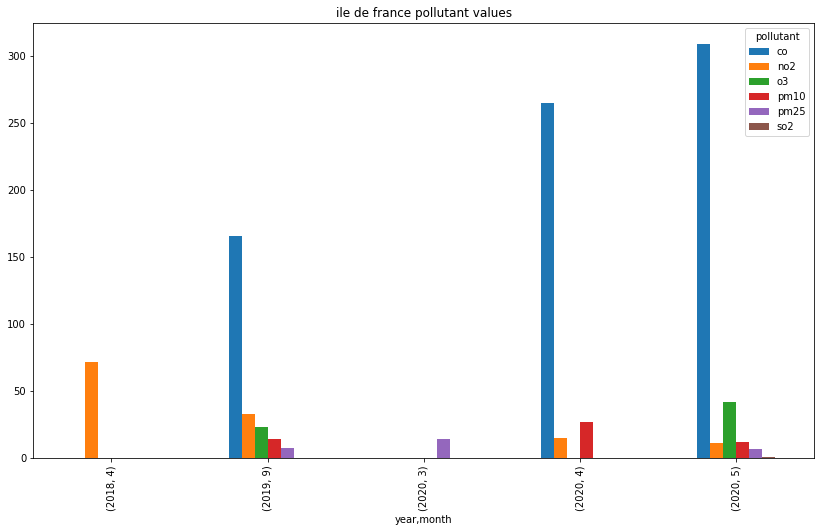

In [47]:
pivot_value = air2.pivot_table(values='value', columns='pollutant', 
                                      index=['year', 'month'], aggfunc='mean')
pivot_value.plot.bar(figsize=(14,8),title='ile de france pollutant values')

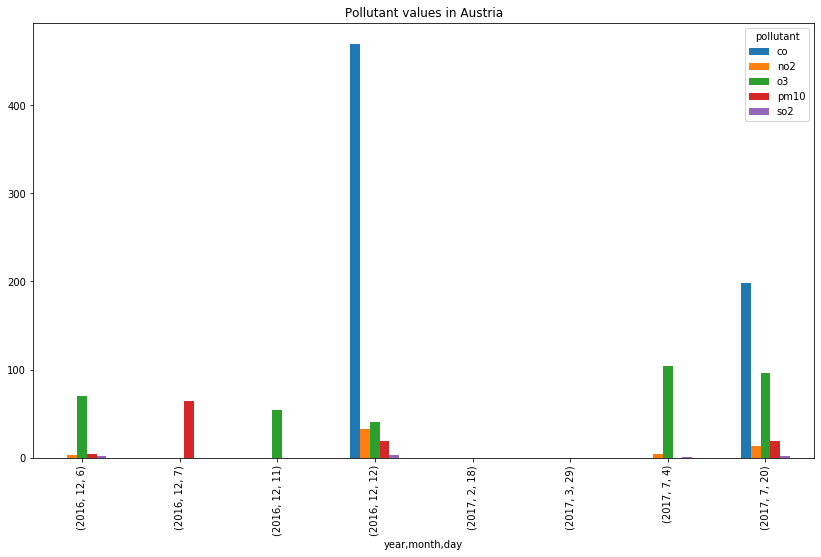

In [48]:
pivot_value2 = air[air.city=='Austria'].pivot_table(values='value', columns='pollutant', 
                                      index=['year', 'month','day'], aggfunc='mean')
pivot_value2.plot.bar(figsize=(14,8),title='Pollutant values in Austria')

In [49]:
air.describe()

,value,latitude,longitude,averaged_over_in_hours,year,month,day
count,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000
mean,25.925054,37.869567,0.186170,1.607132,2019.455795,5.559067,18.108344
std,2541.632548,17.424016,65.175756,4.006588,1.159542,2.116616,5.079017
min,-335582.000000,-72.011700,-161.767000,0.250000,2007.000000,1.000000,1.000000
25%,1.100000,33.299000,-13.860830,1.000000,2020.000000,5.000000,19.000000
50%,9.000000,41.771442,6.870001,1.000000,2020.000000,5.000000,20.000000
75%,29.000000,48.177174,21.141111,1.000000,2020.000000,5.000000,20.000000
max,80000.000000,78.906690,153.402000,59.000000,2020.000000,12.000000,31.000000


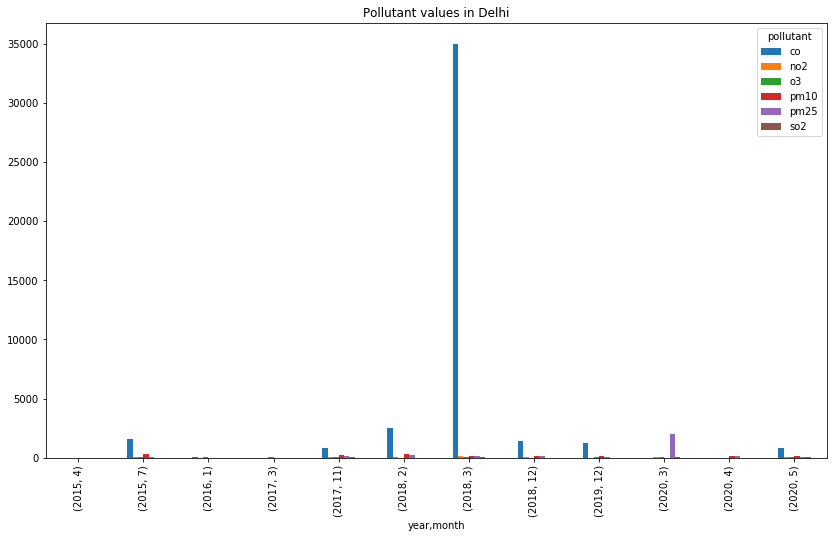

In [50]:
pivot_value2 = air[air.city=='Delhi'].pivot_table(values='value', columns='pollutant', 
                                      index=['year', 'month'], aggfunc='mean')
pivot_value2.plot.bar(figsize=(14,8),title='Pollutant values in Delhi');

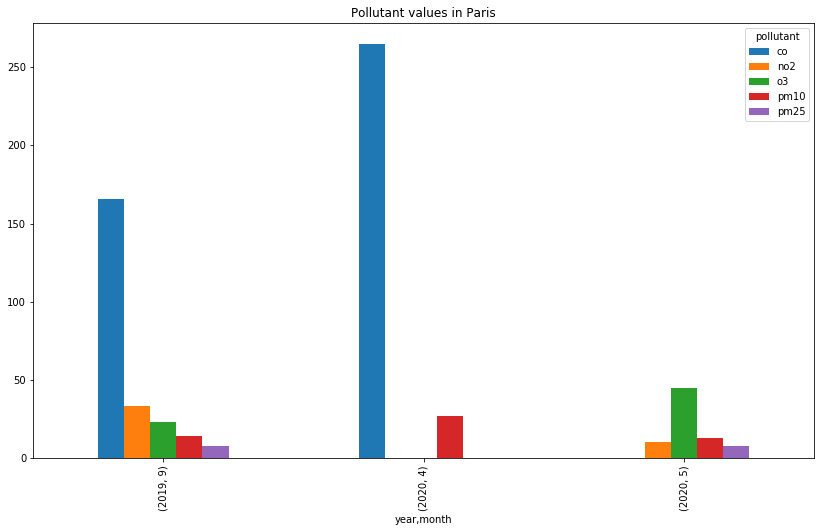

In [51]:
pivot_value2 = air[air.city=='Paris'].pivot_table(values='value', columns='pollutant', 
                                      index=['year', 'month'], aggfunc='mean')
pivot_value2.plot.bar(figsize=(14,8),title='Pollutant values in Paris');

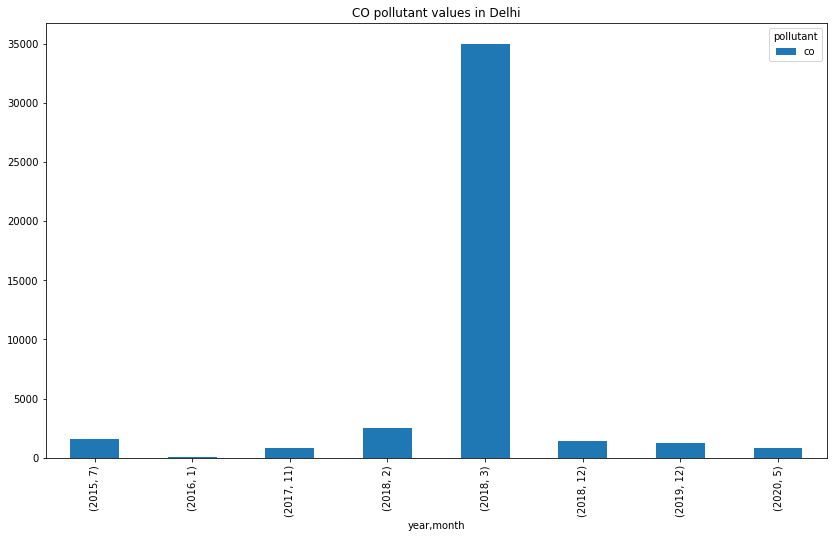

In [52]:
pivot_value2 = air[(air.city=='Delhi')&(air.pollutant=='co')].pivot_table(values='value', columns='pollutant', 
                                      index=['year', 'month'], aggfunc='mean')
pivot_value2.plot.bar(figsize=(14,8),title='CO pollutant values in Delhi');

### Carbon Monoxide Analysis (µg/m³)

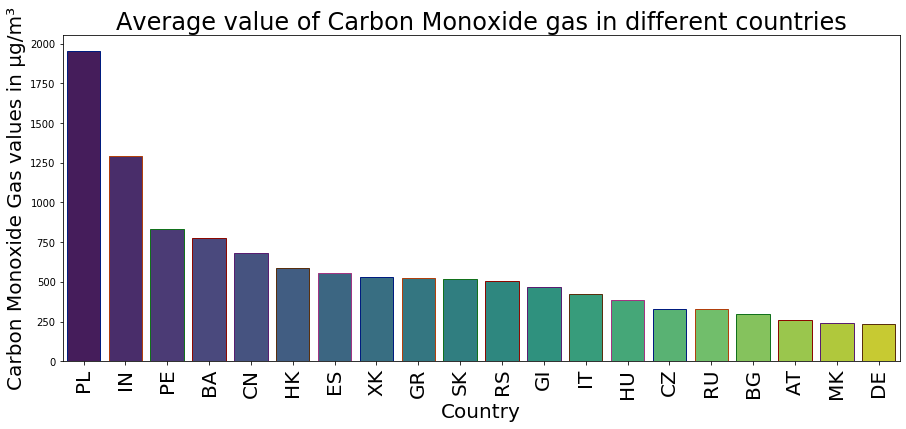

In [53]:
CO = air[(air.pollutant=='co')&(air.unit=='µg/m³')].groupby('country').agg('mean')[['value']].sort_values(by='value',ascending=False).head(20)
CO.reset_index(inplace=True)

plt.subplots(figsize=(15,6))
sns.barplot(x='country',y='value',data=CO,palette='viridis',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Carbon Monoxide Gas values in µg/m³', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Average value of Carbon Monoxide gas in different countries', fontsize=24)
plt.savefig('avg_co.png')
plt.show()

### PM10 Analysis 1 (µg/m³)

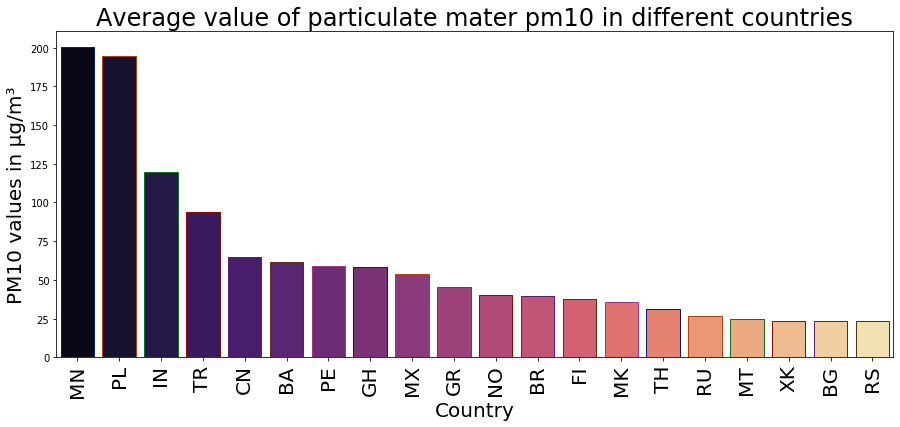

In [54]:
pm10 = air[(air.pollutant=='pm10')&(air.unit=='µg/m³')].groupby('country').agg('mean')[['value']].sort_values(by='value',ascending=False).head(20)

pm10.reset_index(inplace=True)

plt.subplots(figsize=(15,6))
sns.barplot(x='country',y='value',data=pm10,palette='magma',edgecolor=sns.color_palette('dark',7))
plt.ylabel('PM10 values in µg/m³', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Average value of particulate mater pm10 in different countries', fontsize=24)
plt.savefig('avg_pm10.png')
plt.show()

### Nitrogen Dioxide Analysis 1 (µg/m³):

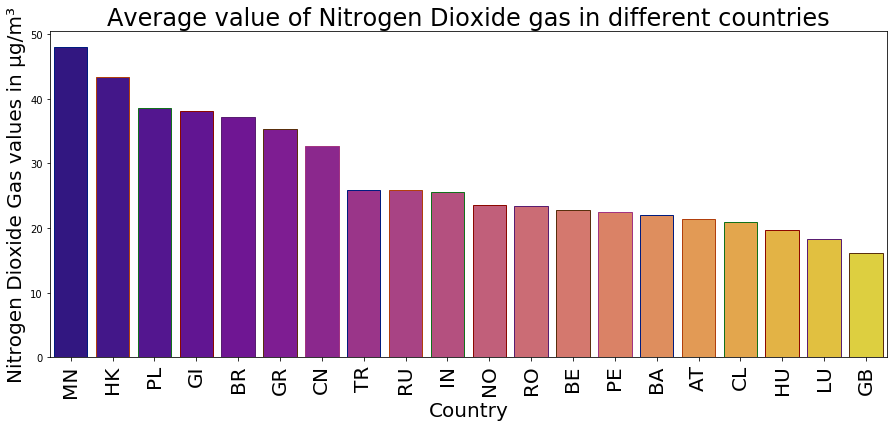

In [55]:
no2 = air[(air.pollutant=='no2')&(air.unit=='µg/m³')].groupby('country').agg('mean')[['value']].sort_values(by='value',ascending=False).head(20)

no2.reset_index(inplace=True)

plt.subplots(figsize=(15,6))
sns.barplot(x='country',y='value',data=no2,palette='plasma',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Nitrogen Dioxide Gas values in µg/m³', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Average value of Nitrogen Dioxide gas in different countries', fontsize=24)
plt.savefig('avg_no2.png')
plt.show()

### Animated Graph/ Carbon Monoxide Analysis

In [39]:
co = air[(air.pollutant=='co')&(air.unit=='µg/m³')].groupby(['country','year']).agg('mean')[['value']].sort_values(by=['year','value'],ascending=False)
co.reset_index(inplace=True)

import plotly.express as px
df = px.data.gapminder()

fig = px.bar(co, x="country", y="value", color="country",
  animation_frame="year", animation_group="country", range_y=[0,13000],title='Average value of Carbon Monoxide gas in different countries')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()